In [87]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt

LOG.propagate = False

timestamps_ms = []
distances = []
setpoint_distances = []
yaws = []
setpoint_yaws = []
left_controls = []
right_controls = []
left_pwms = []
right_pwms = []

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [88]:
def parse_str2data(ss):
    if ss.count('|') < 3:
        # view as normal message
        print(ss)
        return
    # parse to recorded data
    idx, data = ss.split(':')
    timestamp, distance, setpoint_distance, yaw, setpoint_yaw, left_ctrl, right_ctrl, left_pwm, right_pwm \
        = data.split('|')
    if int(timestamp) == 0 and int(distance) == 0 and int(yaw) == 0:
        return
    timestamps_ms.append(int(timestamp))
    distances.append(int(distance))
    setpoint_distances.append(int(setpoint_distance))
    yaws.append(int(yaw))
    setpoint_yaws.append(int(setpoint_yaw))
    left_controls.append(int(left_ctrl))
    right_controls.append(int(right_ctrl))
    left_pwms.append(int(left_pwm))
    right_pwms.append(int(right_pwm))
    
    # print(f"time: {timestamp}  distance: {distance}  control: {ctrl}  left_pwm: {left_pwm}  right_pwm: {right_pwm}")

def notification_handler(uuid, byte_array):
    data_str = ble.bytearray_to_string(byte_array)
    parse_str2data(data_str)

In [89]:
def plot_distance_graph():
    # 转换时间戳为秒（如果需要）
    timestamps_s = [t / 1000.0 for t in timestamps_ms]
    
    # 创建图表和轴
    fig, ax1 = plt.subplots()
    
    # 绘制 distance 曲线
    color = 'tab:red'
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Distance', color=color)
    ax1.plot(timestamps_s, distances, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    
    # 实例化一个新的轴，共享同一个X轴
    ax2 = ax1.twinx()  
    
    # 绘制 control 曲线
    color = 'tab:blue'
    ax2.set_ylabel('Left PWM', color=color)  
    ax2.plot(timestamps_s, left_pwms, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    
    # 给图表加上标题和显示图例
    plt.title('Distance and PWM vs. Time')
    
    # 显示图表
    plt.show()

In [85]:
def save_to_csv():
    
    import pandas as pd
    # Example data
    # distances = [1.0, 2.0, 3.0, 4.0]  # your distances array
    # left_pwms = [10, 20, 30, 40]       # your left PWMs array
    # right_pwms = [15, 25, 35, 45]      # your right PWMs array
    
    # Create a DataFrame
    data = {
        'timestamp_ms': timestamps_ms,
        'distance': distances,
        'left_pwm': left_pwms,
        'right_pwm': right_pwms
    }
    df = pd.DataFrame(data)
    
    # Save the DataFrame to a CSV file
    df.to_csv('output.csv', index=False)


In [99]:
save_to_csv()

In [90]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

ble.start_notify(ble.uuid['RX_STRING'], notification_handler)

2024-04-16 00:14:30,115 | INFO     |: Looking for Artemis Nano Peripheral Device: C0:89:F0:6B:06:4B
2024-04-16 00:14:33,070 | INFO     |: Connected to C0:89:F0:6B:06:4B


/Users/yangd19/Documents/Code/ECE5160-Code/ble_python/base_ble.py:104: FutureWarning: This method will be removed future version, pass the callback to the BleakClient constructor instead.
  self.client.set_disconnected_callback(self.disconnect_handler)


In [100]:
ble.send_command(CMD.PING, "")

PONG


In [101]:
ble.send_command(CMD.START_AUTO, "")
timestamps_ms = []
distances = []
setpoint_distances = []
yaws = []
setpoint_yaws = []
left_controls = []
right_controls = []
left_pwms = []
right_pwms = []

Succeed: start auto running
2024-04-16 00:19:54,395 | INFO     |: Disconnected from 747696FD-B715-05CB-947A-0D181A9C2566


In [93]:
ble.send_command(CMD.STOP, "")

Succeed: brake and stop auto running


In [94]:
ble.send_command(CMD.GET_HISTORY_DATA, "")

Size of records array: 268


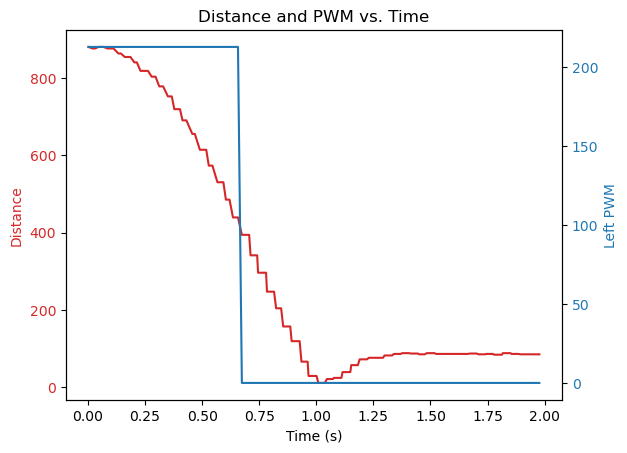

In [98]:
plot_distance_graph()

In [10]:
# ble.send_command(CMD.SET_TWO_CTRL, "125|-220")
# s = ble.receive_string(ble.uuid['RX_STRING'])

In [21]:
# ble.send_command(CMD.GET_CURR_DATA, "")
# s = ble.receive_string(ble.uuid['RX_STRING'])

In [9]:
# ble.send_command(CMD.GET_CURR_DATA, "")
# s = ble.receive_string(ble.uuid['RX_STRING'])

In [10]:
# ble.send_command(CMD.SET_TWO_CTRL, "125|-220")
# s = ble.receive_string(ble.uuid['RX_STRING'])

In [11]:
# ble.send_command(CMD.STOP, "")
# s = ble.receive_string(ble.uuid['RX_STRING'])